In [1]:
from keras.applications import vgg19
from keras import backend as K
from keras.models import Model
from keras.layers import Lambda
from matplotlib.pyplot import imshow
from layers import AdaIN
from models import EncoderModel, DecoderModel, Vgg19TruncatedModel, LossModel
from utils import image_postprocess, list_images
from debug import dump_model, _print_tensor

import tensorflow as tf

import random

import os

from matplotlib import pyplot as plt
from IPython.display import clear_output

from keras.datasets import cifar10

%matplotlib inline 

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
batch_size = 8

In [5]:
src_model = Vgg19TruncatedModel('block1_conv1')

encoder_model = EncoderModel(src_model)

content_input = encoder_model.inputs[0]
style_input = encoder_model.inputs[1]

adain = AdaIN()(encoder_model.outputs)

decoder_output = DecoderModel(src_model, adain.shape.as_list())(adain)

loss_model = LossModel(src_model, adain.shape.as_list(), batch_size)
loss_output = loss_model([decoder_output, style_input, adain])
train_model = Model(inputs=encoder_model.inputs, outputs=[loss_output])


KeyboardInterrupt: 

In [4]:
train_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
content_input_1 (InputLayer)    (None, None, None, 3 0                                            
__________________________________________________________________________________________________
style_input_1 (InputLayer)      (None, None, None, 3 0                                            
__________________________________________________________________________________________________
content_block1_conv1 (Conv2D)   (None, None, None, 6 1792        content_input_1[0][0]            
__________________________________________________________________________________________________
style_block1_conv1 (Conv2D)     (None, None, None, 6 1792        style_input_1[0][0]              
__________________________________________________________________________________________________
ada_in_1 (

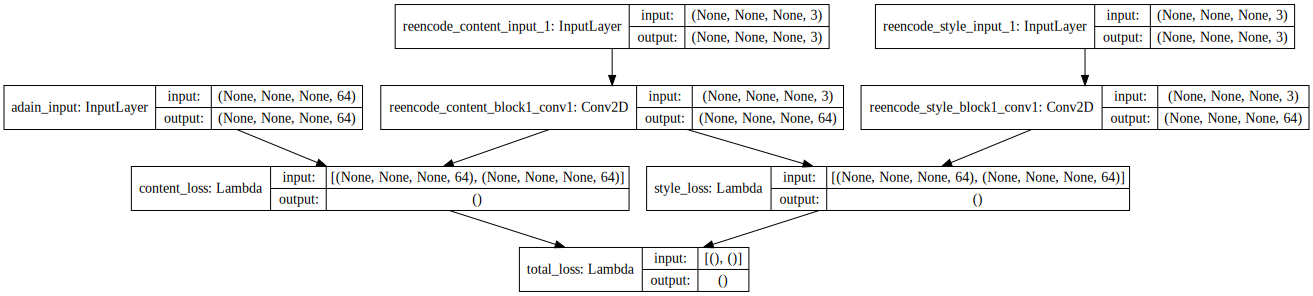

In [5]:
dump_model(loss_model)

In [6]:
train_model.compile(optimizer='adam', loss=lambda x, loss : loss)

# todo

- try with block5_conv2 like this article : https://github.com/titu1994/Neural-Style-Transfer
- use all layer for style transfer: https://github.com/titu1994/Neural-Style-Transfer

- Upsampling2d or unpolling2d ?!
- Reflexion Padding buggy

In [7]:
content_images = list_images("content", limit=16, shape=(32, 32, 3))
style_images = list_images("style", limit=16, shape=(32, 32, 3))

/usr/local/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


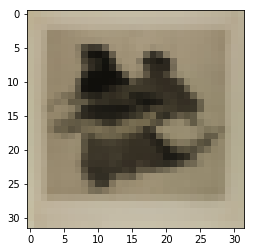

In [8]:
imshow(image_postprocess(style_images[9]))

In [9]:
predict_model = Model(inputs=encoder_model.inputs, outputs=[decoder_output])

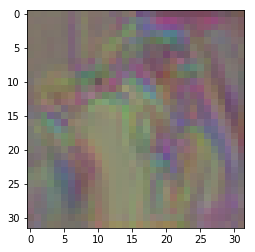

In [10]:
result = predict_model.predict([content_images[:1], content_images[:1]])
imshow(image_postprocess(result[0]))

In [ ]:
train_model.fit([content_images, style_images], content_images, epochs=10, verbose=1, \
                  batch_size=batch_size, shuffle=True)

Epoch 1/10
16/16 [==============================] - 0s 18ms/step - loss: 227.7633
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: nan
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: nan
Epoch 4/10
16/16 [==============================] - 0s 5ms/step - loss: nan
Epoch 5/10
16/16 [==============================] - 0s 5ms/step - loss: nan
Epoch 6/10
16/16 [==============================] - 0s 5ms/step - loss: nan
Epoch 7/10
16/16 [==============================] - 0s 5ms/step - loss: nan
Epoch 8/10
16/16 [==============================] - 0s 4ms/step - loss: nan
Epoch 9/10
16/16 [==============================] - 0s 4ms/step - loss: nan
Epoch 10/10
16/16 [==============================] - 0s 5ms/step - loss: nan


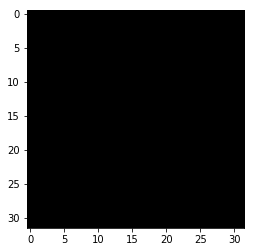

In [12]:
result = predict_model.predict([content_images[:1], content_images[:1]])
imshow(image_postprocess(result[0]))

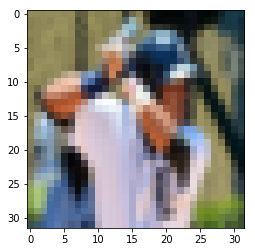

In [13]:
imshow(image_postprocess(content_images[0]))